## Training and running a linear model using Linear Regression

In [109]:
# import packages
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt


In [110]:
# function to preprocess the datasets
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [111]:
# load datasets
oecd_bli = pd.read_csv('datasets/lifesat/oecd_bli_2015.csv', thousands = ',')
gdp_per_capita = pd.read_csv('datasets/lifesat/gdp_per_capita.csv', thousands= ',', 
                             delimiter= '\t', encoding='latin1', na_values = 'n/a')

In [112]:
oecd_bli.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [113]:
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [114]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [115]:
# define the features and targets as (x, y)
x = np.array(country_stats['GDP per capita']).reshape(-1, 1)
y = np.array(country_stats['Life satisfaction']).reshape(-1, 1)

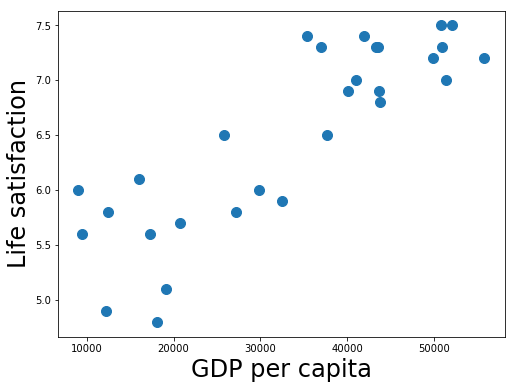

In [130]:
# Peek into the dataset
fig = plt.subplots(figsize = (8, 6))
plt.plot(x, y, marker='o', linestyle = 'none', markersize = 10)
plt.xlabel('GDP per capita', fontsize=24)
plt.ylabel('Life satisfaction', fontsize=24)
plt.show()

In [117]:
# Use the linear regression model from sklearn.linear_model
linear_regression_model = linear_model.LinearRegression()

In [118]:
# fit the (x, y) dataset by the linear regressor
linear_regression_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
# make prediction, prepare the x_new.shape = (n_samples, n_features)
x_new = np.array([40000]).reshape(-1, 1)
print("Life Satification rate [%d] = %.1f"%(x_new,linear_regression_model.predict(x_new)))

Life Satification rate [40000] = 6.8
